# Capstone 3: Predictive Modeling for Treatment Success Rates

## Introduction

Welcome to Capstone 3! In this project, we will be focusing on predictive modeling to forecast treatment success rates for patients in healthcare settings. The goal of this capstone project is to leverage machine learning techniques to develop accurate models that can predict the likelihood of treatment success based on various factors such as hospital characteristics, medical condition severity, admission type, test results, doctor expertise, and network metrics.

### Objectives
- Identify factors influencing treatment effectiveness in healthcare settings.
- Build predictive models using logistic regression and random forest algorithms.
- Evaluate model performance using classification metrics and ROC-AUC score.
- Interpret model results using partial plots and permutation importance.

## Dataset
The dataset used in this project contains information on patients admitted to hospitals, including demographic information, medical conditions, admission details, test results, doctor assignments, billing amounts, and treatment outcomes. The dataset has undergone data wrangling, exploratory data analysis (EDA), and network analysis to prepare it for predictive modeling.

### Data Wrangling and EDA
During the data wrangling phase, we cleaned the dataset, handled missing values, and formatted the data for analysis. Exploratory data analysis (EDA) was performed to gain insights into the distributions, relationships, and patterns within the dataset.

### Network Analysis
As part of our analysis, we conducted network analysis to explore relationships between hospitals, medical conditions, admission types, test results, and other variables. This provided valuable insights into the structure and dynamics of the healthcare network.

# Data Wrangling

## Load the Data
First, we'll read the dataset into a DataFrame using pandas. This allows us to work with the data in Python for further analysis.

## Inspect the Data
Next, we'll examine the structure of the dataset to gain a better understanding of its contents. We'll check for missing values, explore the data types of each column, and look for any inconsistencies or anomalies.

## Clean the Data
In this step, we'll address any inconsistencies or errors in the dataset. This may involve fixing formatting issues, handling missing values, removing outliers, or standardizing data across columns.

## Prepare the Data
Once the data is clean, we'll prepare it for analysis. This involves selecting relevant columns for our analysis, renaming columns if necessary for clarity, and converting data types as needed. For example, we may convert date fields to datetime objects for easier manipulation.


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community 
import itertools
from sklearn.preprocessing import LabelEncoder
from dataframe_image import export

# Load the dataset
data = pd.read_csv('healthcare_dataset.csv')


In [13]:
# Inspect the data

# Examine the structure of the dataset
print(data.info())

# Check for missing values
print(data.isnull().sum())

# Identify data types
print(data.dtypes)

# Display the first few rows of the DataFrame
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [74]:
# Clean the Data

# No missing values found, so no further cleaning required for missing values

# Prepare the Data
# Convert 'Date of Admission' and 'Discharge Date' to datetime
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])

# Convert 'Hospital' column to numerical categorical
data['Hospital'] = pd.Categorical(data['Hospital']).codes

# Create a label encoder object for 'Doctor' column
doctor_encoder = LabelEncoder()

# Encode doctors' names into numerical values
data['Doctor_Code'] = doctor_encoder.fit_transform(data['Doctor'])

# Save the mapping from names to codes for future reference if needed
doctor_mapping = pd.Series(index=doctor_encoder.classes_, data=doctor_encoder.transform(doctor_encoder.classes_))

# Select relevant columns for analysis
relevant_columns = ['Hospital', 'Medical Condition', 'Admission Type', 'Test Results', 'Billing Amount', 'Insurance Provider', 'Doctor_Code']
df = data[relevant_columns]

# Check the modified DataFrame
print(df.head())
print("\nDoctor Mapping:\n", doctor_mapping.head())

   Hospital Medical Condition Admission Type  Test Results  Billing Amount  \
0      7960          Diabetes       Elective  Inconclusive    37490.983364   
1       978            Asthma      Emergency        Normal    47304.064845   
2      7996           Obesity      Emergency        Normal    36874.896997   
3      2482            Asthma         Urgent      Abnormal    23303.322092   
4      3908         Arthritis         Urgent        Normal    18086.344184   

  Insurance Provider  Doctor_Code  
0           Medicare         7167  
1   UnitedHealthcare         2597  
2           Medicare         7180  
3           Medicare         1169  
4   UnitedHealthcare         2775  

Doctor Mapping:
 Aaron Anderson    0
Aaron Barrera     1
Aaron Boone       2
Aaron Brewer      3
Aaron Brown       4
dtype: int32


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hospital            10000 non-null  int16  
 1   Medical Condition   10000 non-null  object 
 2   Admission Type      10000 non-null  object 
 3   Test Results        10000 non-null  object 
 4   Billing Amount      10000 non-null  float64
 5   Insurance Provider  10000 non-null  object 
 6   Doctor_Code         10000 non-null  int32  
dtypes: float64(1), int16(1), int32(1), object(4)
memory usage: 449.3+ KB


# Exploratory Data Analysis (EDA)

# Exploratory Data Analysis (EDA)

## Univariate Analysis

### Distributions of Individual Variables
We'll explore the distributions of individual variables such as 'Medical Condition', 'Admission Type', 'Test Results', 'Billing Amount', and 'Insurance Provider'. This will involve creating visualizations like histograms to visualize the distribution of each variable.

### Summary Statistics for Numerical Variables
We'll calculate summary statistics (e.g., mean, median, mode, standard deviation) for numerical variables such as 'Billing Amount'. This will provide insights into the central tendency and dispersion of the data.

## Bivariate Analysis

### Relationships between Pairs of Variables
We'll examine relationships between pairs of variables, such as:
- Medical Condition vs. Test Results
- Admission Type vs. Billing Amount
- Insurance Provider vs. Test Results

We'll use visualizations like histograms, box plots, and scatter plots to visualize these relationships and identify any patterns or trends.

## Multivariate Analysis

### Interactions between Multiple Variables
We'll explore interactions between multiple variables simultaneously, considering combinations like:
- Medical Condition, Admission Type, and Test Results
- Insurance Provider, Billing Amount, and Hospital

We'll use techniques like pivot tables or heatmaps to summarize relationships between multiple variables and uncover complex patterns in the data.

## Summary Statistics

### Summary Statistics for Categorical Variables
We'll compute summary statistics for categorical variables, including counts and proportions of unique categories. This will provide insights into the distribution and frequency of different categories within each variable.

### Descriptive Statistics for Numerical Variables
We'll generate descriptive statistics for numerical variables, including mean, median, standard deviation, and range. This will help us understand the central tendency and variability of numerical data.

## Visualization

### Creating Visualizations
We'll create visualizations to illustrate key findings, such as bar plots for categorical variables and histograms or box plots for numerical variables. We'll use seaborn, matplot


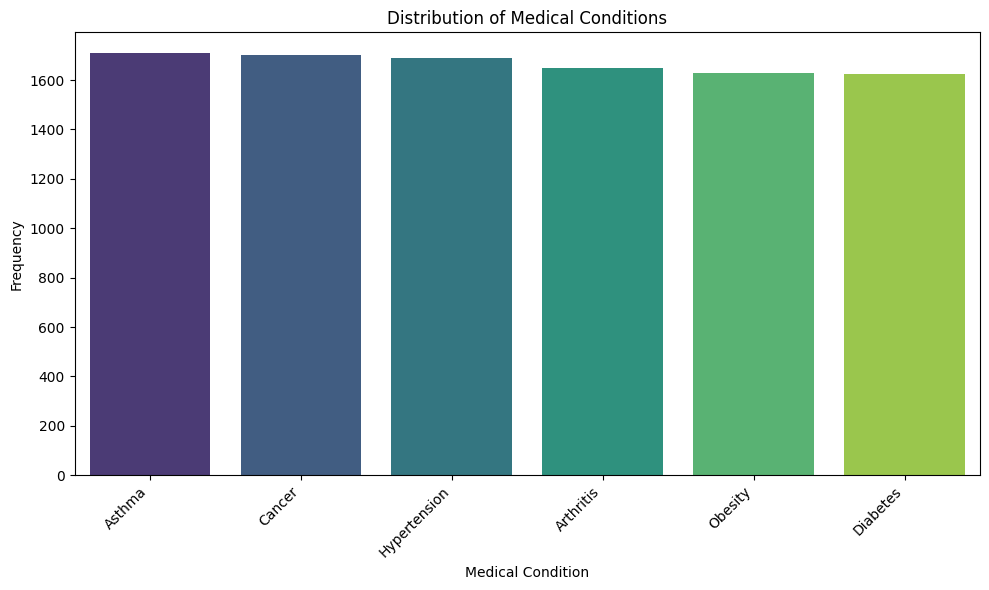

In [16]:
# Medical Condition:
# Calculate frequency of each medical condition
medical_condition_counts = data['Medical Condition'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=medical_condition_counts.index, y=medical_condition_counts.values, palette='viridis')
plt.title('Distribution of Medical Conditions')
plt.xlabel('Medical Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig('Distribution_medical_conditions')
plt.tight_layout()
plt.show()

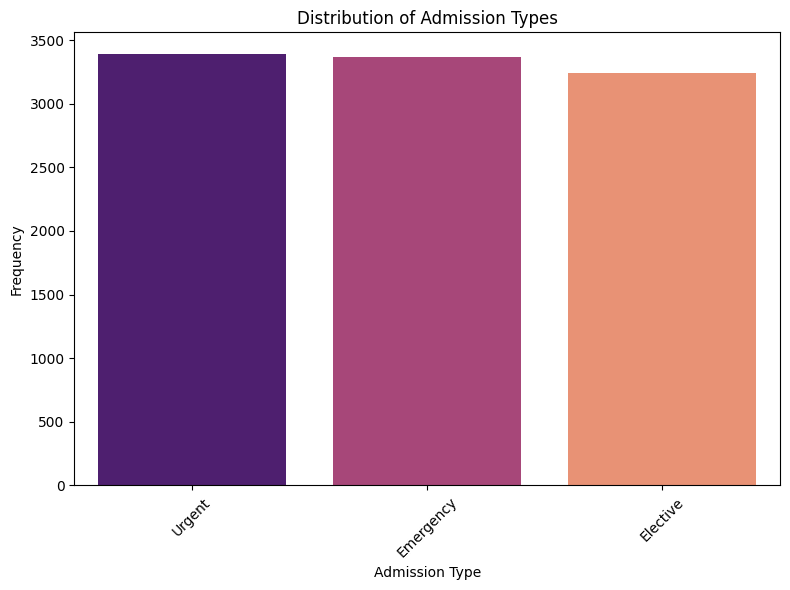

In [17]:
# Admission Type

# Calculate frequency of each admission type
admission_type_counts = data['Admission Type'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=admission_type_counts.index, y=admission_type_counts.values, palette='magma')
plt.title('Distribution of Admission Types')
plt.xlabel('Admission Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.savefig('Distribution_Admission_types')
plt.tight_layout()
plt.show()


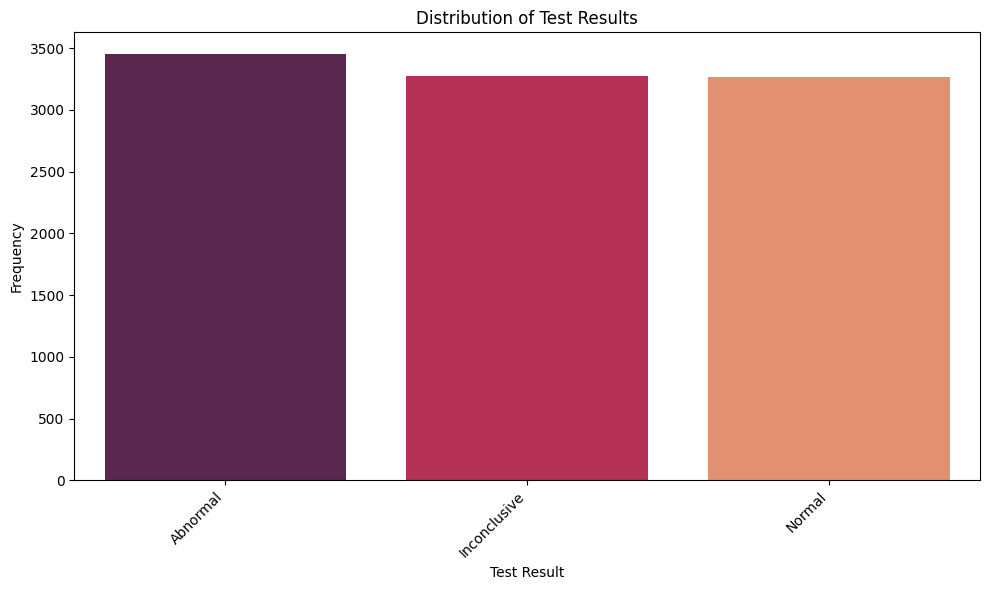

In [18]:
# Test Results

# Calculate frequency of each test result
test_results_counts = data['Test Results'].value_counts()

# Visualize the distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=test_results_counts.index, y=test_results_counts.values, palette='rocket')
plt.title('Distribution of Test Results')
plt.xlabel('Test Result')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.savefig('distribution_test_results')
plt.tight_layout()
plt.show()


C:\Users\afnan\OneDrive\Desktop\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


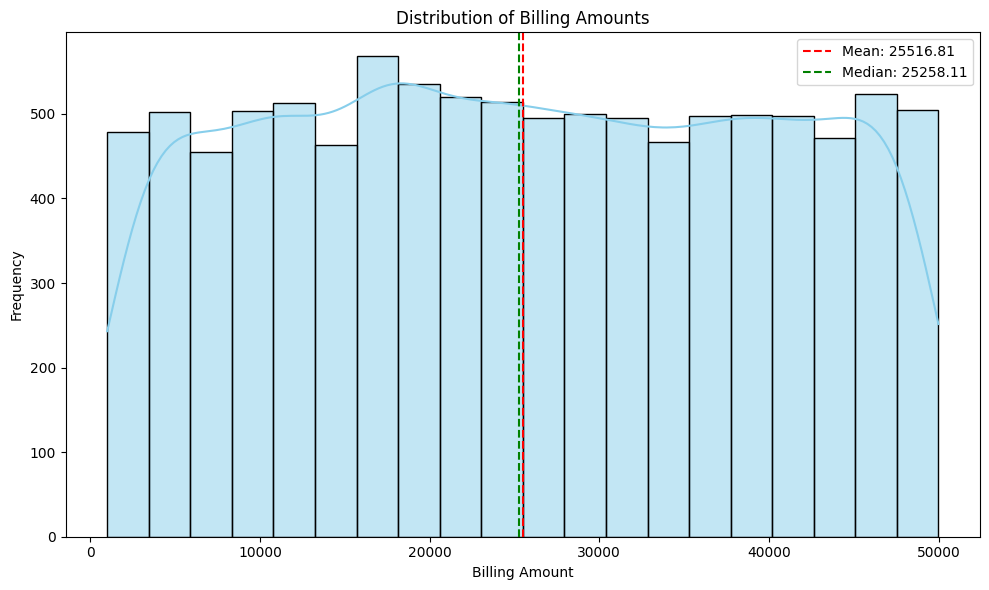

In [19]:
# Billing Amount

# Calculate statistics for the billing amount
billing_amount_stats = data['Billing Amount'].describe()

# Visualize the distribution using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['Billing Amount'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Billing Amounts')
plt.xlabel('Billing Amount')
plt.ylabel('Frequency')
plt.axvline(x=billing_amount_stats['mean'], color='red', linestyle='--', label=f'Mean: {billing_amount_stats["mean"]:.2f}')
plt.axvline(x=billing_amount_stats['50%'], color='green', linestyle='--', label=f'Median: {billing_amount_stats["50%"]:.2f}')
plt.legend()
plt.savefig('Distribution_Billing_Amounts')
plt.tight_layout()
plt.show()


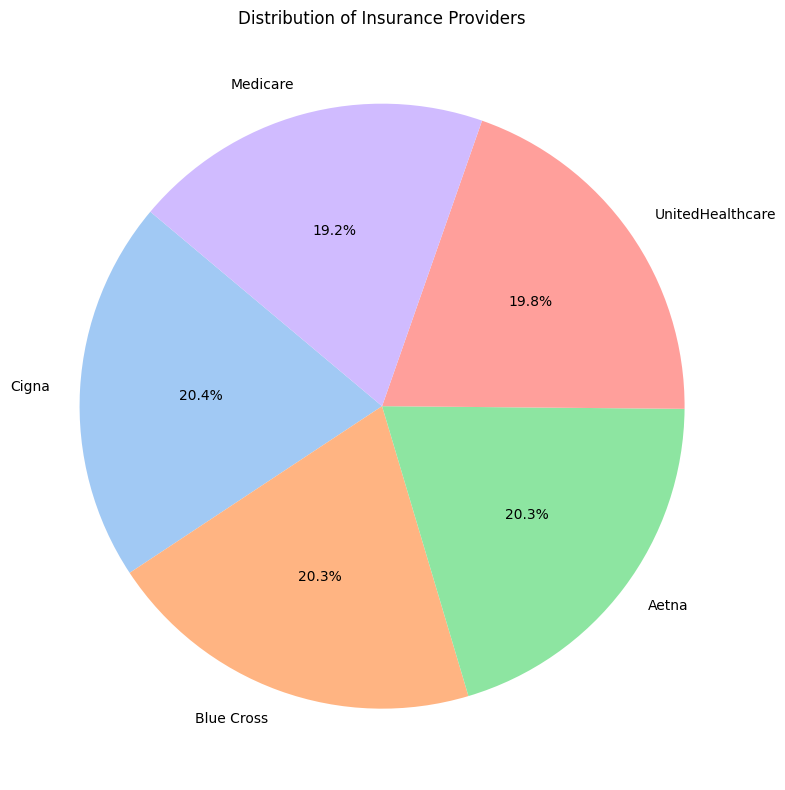

In [20]:
# Insurance Provider

# Calculate frequency of each insurance provider
insurance_provider_counts = data['Insurance Provider'].value_counts()

# Visualize the distribution using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(insurance_provider_counts, labels=insurance_provider_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Distribution of Insurance Providers')
plt.axis('equal')
plt.savefig('Distribution_Insurance_Providers')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

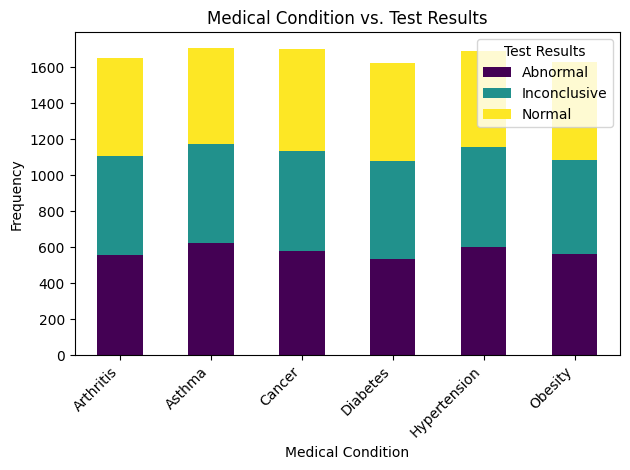

In [21]:
# Medical Condition vs. Test Results

# Create a contingency table of medical condition vs. test results
medical_condition_test_results = pd.crosstab(data['Medical Condition'], data['Test Results'])

# Visualize the relationship using a stacked bar plot
plt.figure(figsize=(12, 8))
medical_condition_test_results.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Medical Condition vs. Test Results')
plt.xlabel('Medical Condition')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Test Results')
plt.savefig('Condition_Vs_results')
plt.tight_layout()
plt.show()


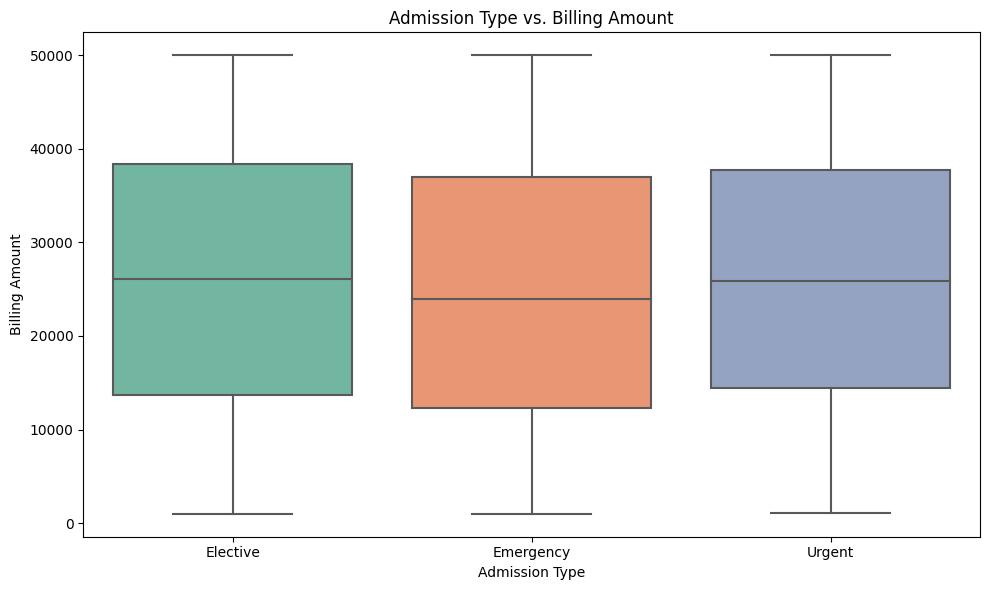

In [22]:
# Admission Type vs. Billing Amount

# Create box plot for Admission Type vs. Billing Amount
plt.figure(figsize=(10, 6))
sns.boxplot(x='Admission Type', y='Billing Amount', data=data, palette='Set2')
plt.title('Admission Type vs. Billing Amount')
plt.xlabel('Admission Type')
plt.ylabel('Billing Amount')
plt.savefig('admission_vs_billing')
plt.tight_layout()
plt.show()


<Figure size 1200x800 with 0 Axes>

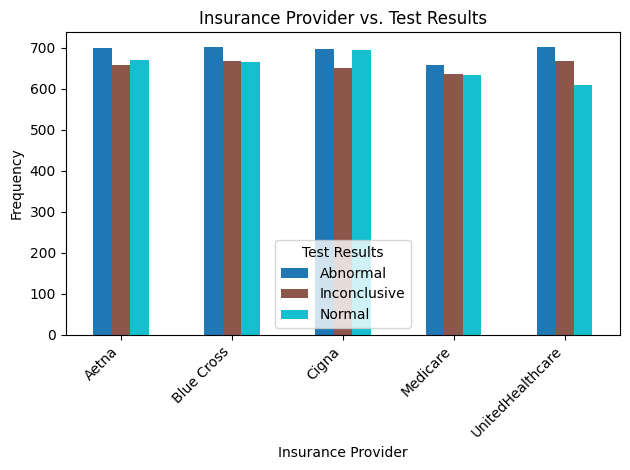

In [23]:
# Insurance Provider vs. Test Results

# Create a contingency table of insurance provider vs. test results
insurance_provider_test_results = pd.crosstab(data['Insurance Provider'], data['Test Results'])

# Visualize the relationship using a grouped bar plot
plt.figure(figsize=(12, 8))
insurance_provider_test_results.plot(kind='bar', colormap='tab10')
plt.title('Insurance Provider vs. Test Results')
plt.xlabel('Insurance Provider')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Test Results')
plt.savefig('Insurance_vs_results')
plt.tight_layout()
plt.show()


In [24]:
# Multivairiate analysis

# Create a pivot table to summarize the frequency of Test Results based on Medical Condition and Admission Type
pivot_table_medical_admission_test = data.pivot_table(index=['Medical Condition', 'Admission Type'], 
                                                     columns='Test Results', 
                                                     aggfunc='size', 
                                                     fill_value=0)

# Display the pivot table
print("Pivot Table - Medical Condition, Admission Type, and Test Results:")
print(pivot_table_medical_admission_test)
export(pivot_table_medical_admission_test, 'pivot_table_medical_admission_test.png')

Pivot Table - Medical Condition, Admission Type, and Test Results:
Test Results                      Abnormal  Inconclusive  Normal
Medical Condition Admission Type                                
Arthritis         Elective             193           192     184
                  Emergency            176           173     180
                  Urgent               186           188     178
Asthma            Elective             212           177     181
                  Emergency            204           172     180
                  Urgent               207           202     173
Cancer            Elective             187           175     193
                  Emergency            195           189     194
                  Urgent               195           192     183
Diabetes          Elective             176           182     170
                  Emergency            172           201     184
                  Urgent               189           159     190
Hypertension      Elect

In [25]:
# Create a pivot table to summarize the mean Billing Amount for each combination of Insurance Provider and Hospital
pivot_table_insurance_hospital_billing = data.pivot_table(index='Insurance Provider', 
                                                          columns='Hospital', 
                                                          values='Billing Amount', 
                                                          aggfunc='mean', 
                                                          fill_value=0)

# Display the pivot table
print("Pivot Table - Insurance Provider, Hospital, and Mean Billing Amount:")
print(pivot_table_insurance_hospital_billing)

Pivot Table - Insurance Provider, Hospital, and Mean Billing Amount:
Hospital                    0             1             2             3     \
Insurance Provider                                                           
Aetna                   0.000000      0.000000      0.000000      0.000000   
Blue Cross              0.000000  10724.794198      0.000000  11869.283651   
Cigna               32114.205148      0.000000  31786.830979      0.000000   
Medicare                0.000000  10269.930801      0.000000      0.000000   
UnitedHealthcare        0.000000      0.000000      0.000000      0.000000   

Hospital                    4            5            6             7     \
Insurance Provider                                                         
Aetna               25326.805551     0.000000     0.000000      0.000000   
Blue Cross              0.000000  1848.518789     0.000000      0.000000   
Cigna                   0.000000     0.000000     0.000000  16229.170609   
Medi

In [26]:
# Summary Stats:

# Summary statistics for categorical variables
categorical_variables = ['Medical Condition', 'Gender', 'Blood Type', 'Admission Type', 'Insurance Provider']

for var in categorical_variables:
    print(f"Summary statistics for {var}:")
    print(data[var].value_counts())
    print()


# Summary statistics for numerical variables
numerical_variables = ['Age', 'Billing Amount', 'Room Number']

numerical_stats = data[numerical_variables].describe()
print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)


Summary statistics for Medical Condition:
Medical Condition
Asthma          1708
Cancer          1703
Hypertension    1688
Arthritis       1650
Obesity         1628
Diabetes        1623
Name: count, dtype: int64

Summary statistics for Gender:
Gender
Female    5075
Male      4925
Name: count, dtype: int64

Summary statistics for Blood Type:
Blood Type
AB-    1275
AB+    1258
B-     1252
O+     1248
O-     1244
B+     1244
A+     1241
A-     1238
Name: count, dtype: int64

Summary statistics for Admission Type:
Admission Type
Urgent       3391
Emergency    3367
Elective     3242
Name: count, dtype: int64

Summary statistics for Insurance Provider:
Insurance Provider
Cigna               2040
Blue Cross          2032
Aetna               2025
UnitedHealthcare    1978
Medicare            1925
Name: count, dtype: int64

Descriptive Statistics for Numerical Variables:
                Age  Billing Amount   Room Number
count  10000.000000    10000.000000  10000.000000
mean      51.452200    255

**Arthritis**:

- Elective admissions see a roughly equal distribution of all test result types.

- Emergency and Urgent admissions show a similar pattern, slightly favoring inconclusive results.

**Asthma**:

- Elective admissions have a higher count of abnormal results compared to Emergency and Urgent.

- The number of normal results is somewhat consistent across admission types.

**Cancer**:

- The number of normal results is highest under Elective admissions.

- Emergency admissions show a higher distribution in the inconclusive category.

**Diabetes**:

- Abnormal results are slightly less in Emergency admissions compared to Elective and Urgent.

- Normal results are consistently around the same range across all admission types.

**Hypertension**:

- Urgent admissions show a notable increase in abnormal results compared to other types.

- Elective admissions demonstrate a balance among all test result types.

**Obesity**:

- Emergency admissions have the highest count of abnormal results.

- Normal results are more prevalent in Elective and Urgent admissions.

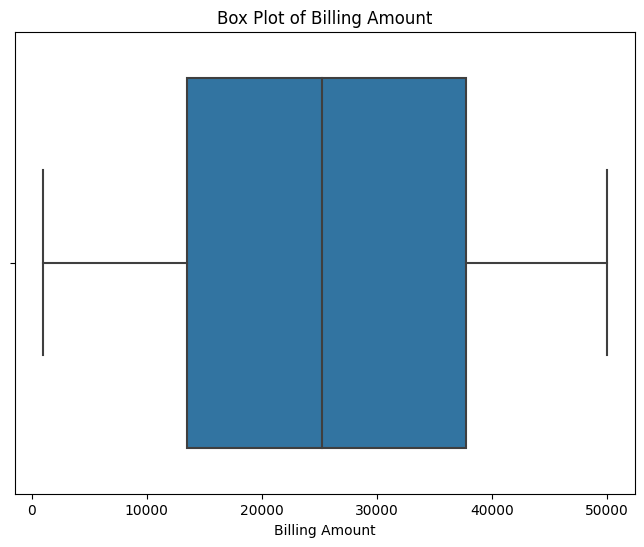

Potential Outliers based on Z-Scores:
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results, Doctor_Code]
Index: []


In [27]:
# Outlier Detection:
# Box plot for 'Billing Amount'
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='Billing Amount')
plt.title('Box Plot of Billing Amount')
plt.xlabel('Billing Amount')
plt.savefig('BoxPlot_Billing_Outlier_check')
plt.show()


# Calculate z-scores for 'Billing Amount'
z_scores = (data['Billing Amount'] - data['Billing Amount'].mean()) / data['Billing Amount'].std()

# Identify potential outliers based on z-scores
threshold = 3
potential_outliers = data[abs(z_scores) > threshold]

print("Potential Outliers based on Z-Scores:")
print(potential_outliers)


# Modeling

## Network Construction 

### Define Nodes
For our network analysis, we'll define nodes based on the entities available in our dataset after preprocessing. These entities include hospitals, medical conditions, doctors, and insurance providers.

### Define Edges
We'll establish relationships between pairs of nodes to represent interactions or associations between entities. These relationships could include patient admissions to hospitals for specific medical conditions, treatments provided by doctors for particular medical conditions, and affiliations between hospitals and insurance providers.

### Construct the Network
Using a network representation, such as a graph data structure, we'll create the network by adding nodes and edges based on the relationships identified in the dataset.

### Visualize the Network
We'll employ graph visualization techniques to visualize the constructed network, exploring its structure and relationships. We'll adjust the layout and appearance of the network visualization to enhance clarity and interpretability.

### Explore Network Properties
We'll compute basic network properties and metrics to gain insights into the characteristics of the network. This may include analyzing the node degree distribution, network density, and centrality measures to understand the importance and connectivity of nodes within the network.

## Network Analysis

### Network Metrics Calculation
We'll calculate various network metrics to quantify the properties of the network, such as centrality measures (e.g., degree centrality, betweenness centrality), network density, and clustering coefficients. These metrics will provide insights into the structure and dynamics of the network.

### Community Detection
Using community detection algorithms, we'll identify communities or clusters within the network. This will help us uncover groups of nodes that are densely connected internally but sparsely connected to other groups, revealing underlying structures within the network.

### Interpretation and Insights
We'll interpret the findings from the network analysis in the context of our research questions and objectives. Extracting actionable insights or conclusions, we'll explore the implications of the network structure and properties for healthcare management or policy decisions.

### Reporting and Visualization
To communicate our findings effectively, we'll present the results of the network analysis through reports, visualizations, or interactive dashboards. Clear and understandable visualizations will be used to convey the network structure, metrics, and insights to stakeholders.

### Iteration and Refinement
Based on feedback and additional data sources, we'll iterate on the network analysis, refining the network model and exploring alternative representations. We may conduct sensitivity analyses to assess the robustness of our findings and further refine our interpretations.



## Network Construction 
In our network analysis, we'll construct a network where the nodes represent entities or variables, and the edges represent connections or relationships between them. Here's how we'll define the nodes and edges based on the direct variables mentioned:

### Nodes:

- Hospital
- Medical Condition
- Admission Type
- Test Results
- Doctor_Code

### Edges:

- Hospital - Medical Condition: This edge represents the relationship between hospitals and the types of medical conditions they treat.
- Hospital - Admission Type: This edge represents the relationship between hospitals and the different admission types of patients they admit.
- Hospital - Test Results: This edge represents the relationship between hospitals and the test results indicating treatment effectiveness.
- Hospital - Doctor_Code: This edge represents the relationship between hospitals and the doctors responsible for treatments.

These edges will enable us to analyze how hospitals are connected to different medical conditions, admission types, test results, and doctors. By examining these relationships, we can gain insights into factors influencing treatment effectiveness and identify hospitals with high success rates.


In [ ]:
import numpy as np

# Aggregate hospital data
hospital_attributes = df.groupby('Hospital').agg({
    'Billing Amount': 'mean',
    'Medical Condition': lambda x: list(np.unique(x)),
    'Admission Type': lambda x: list(np.unique(x))
}).reset_index()

# Initialize a graph
G = nx.Graph()

# Add hospitals as nodes with attributes
for index, row in hospital_attributes.iterrows():
    G.add_node(row['Hospital'], billing_amount=row['Billing Amount'], 
               medical_conditions=row['Medical Condition'], admission_types=row['Admission Type'])

# Add edges based on shared medical conditions
for i in range(len(hospital_attributes)):
    for j in range(i + 1, len(hospital_attributes)):
        # Intersection of medical conditions treated by both hospitals
        shared_conditions = set(hospital_attributes.iloc[i]['Medical Condition']) & set(hospital_attributes.iloc[j]['Medical Condition'])
        if shared_conditions:
            G.add_edge(hospital_attributes.iloc[i]['Hospital'], hospital_attributes.iloc[j]['Hospital'], 
                       weight=len(shared_conditions))

# Output the basic information of the network
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()

# Visualizing the network (basic visualization)
nx.draw(G, with_labels=True, node_size=50, font_size=8)
plt.show()

(num_nodes, num_edges)

In [ ]:
# Basic network visualization
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_optimized, seed=42)  # Positions for all nodes
nx.draw_networkx_nodes(G_optimized, pos, node_size=70, node_color='blue', alpha=0.6)
nx.draw_networkx_edges(G_optimized, pos, alpha=0.2)
nx.draw_networkx_labels(G_optimized, pos, font_size=8, font_color='black')
plt.title('Hospital Network Visualization')
plt.show()


In [ ]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G_optimized)
# Sort nodes by degree centrality
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

# Betweenness Centrality
betweenness_centrality = nx.betweenness_centrality(G_optimized)
# Sort nodes by betweenness centrality
sorted_betweenness_centrality = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)

# Print top 5 nodes by degree centrality
print("Top 5 hospitals by degree centrality:")
for node, centrality in sorted_degree_centrality[:5]:
    print(f"Hospital {node}: {centrality}")

# Print top 5 nodes by betweenness centrality
print("Top 5 hospitals by betweenness centrality:")
for node, centrality in sorted_betweenness_centrality[:5]:
    print(f"Hospital {node}: {centrality}")

In [ ]:
# Detect communities in the network
partition = community_louvain.best_partition(G_optimized)

# Visualization with communities
pos = nx.spring_layout(G_optimized, seed=42)
plt.figure(figsize=(12, 12))
cmap = plt.cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G_optimized, pos, partition.keys(), node_size=70,
                       cmap=cmap, node_color=list(partition.values()), alpha=0.6)
nx.draw_networkx_edges(G_optimized, pos, alpha=0.2)
nx.draw_networkx_labels(G_optimized, pos, font_size=8, font_color='black')
plt.title('Network Visualization with Community Structure')
plt.show()

# Print the size of each community
community_sizes = {i: list(partition.values()).count(i) for i in set(partition.values())}
print("Community sizes:", community_sizes)